In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# PIPE ANALYSES 

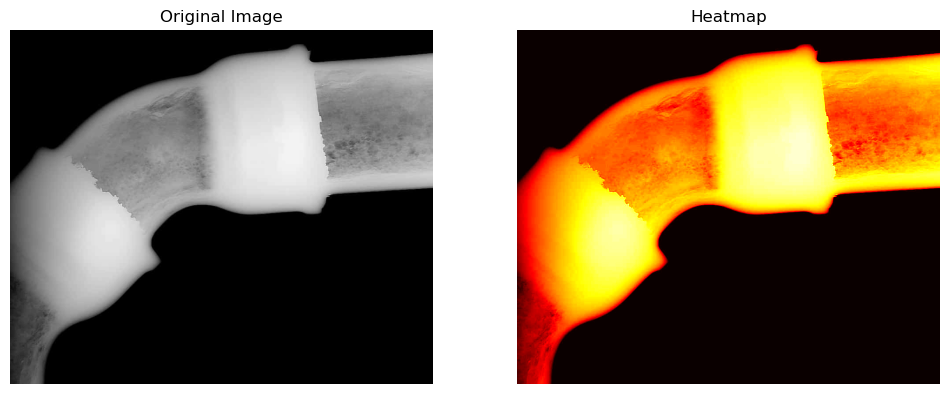

In [88]:
# Read the black and white image
image = cv2.imread("project_pics\pipe.JPG", cv2.IMREAD_GRAYSCALE)

# Check if the image was read successfully
if image is None:
    print("Error: Unable to read the image file.")
else:
    # Display the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display the heatmap
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='hot')
    plt.title('Heatmap')
    plt.axis('off')

    plt.show()


## Using heatmap to detect textural and structural differences in the shape and the initial detection is easier than the image

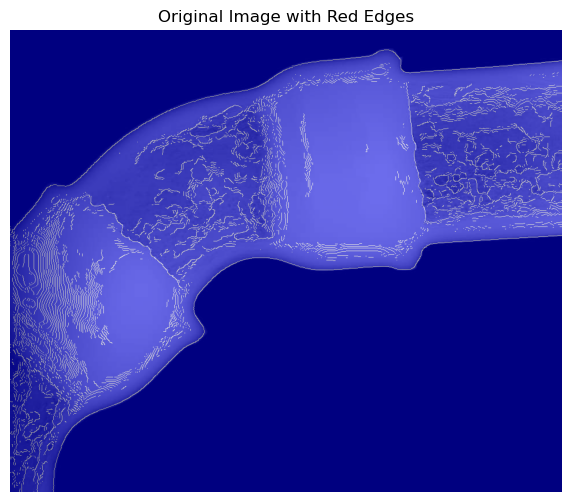

In [89]:
# Check if the image was read successfully
if image is None:
    print("Error: Unable to read the image file.")
else:
    # Apply Canny edge detection to find edges
    blur = cv2.GaussianBlur(image, (25, 25), 0, sigmaY=0)
    edges = cv2.Canny(blur, 50, 90, apertureSize=5, L2gradient=True)

    # Convert edges to color
    edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    edges_color[:, :, 0] = 255 

    # Combine the original image with the edges drawn in blue
    combined_image = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), 0.5, edges_color, 0.5, 0)

    # Display the combined image
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Red Edges')
    plt.axis('off')
    plt.show()


### Revealing the small inhomogeneities and cracks in the pipe tissue that cannot be seen with the eye and plays an effective role in the failure of the rod.

### Explanation: This code first checks whether the image was successfully read or not. Then it performs Canny edge detection on the image. Converts the resulting edges to color and blends them with the original image. Finally, the composite image shows the edges in blue.

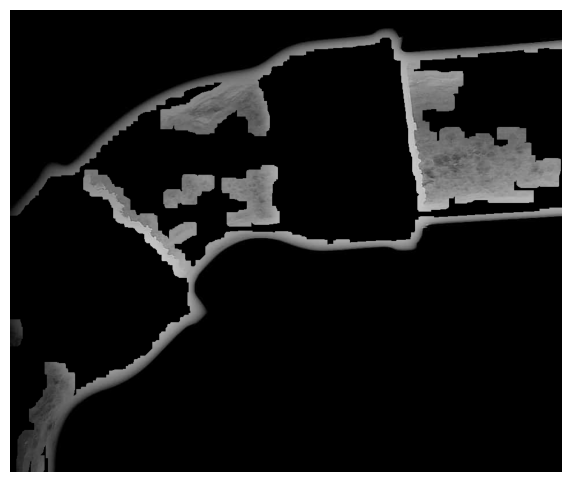

In [90]:
# Check if the image was read successfully
if image is None:
    print("Error: Unable to read the image file.")
else:
    original = image.copy()
    mask = np.zeros(image.shape[:2], dtype=np.uint8)  # Create a mask with the same size as the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Increase sensitivity of edge detection
    edges = cv2.Canny(blurred, 15, 55)

    # Create a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Dilate the edges to close gaps and get outer edges
    dilated_edges = cv2.dilate(edges, kernel, iterations=5)
    outer_edges = dilated_edges - edges

    # Erode the edges to get inner edges
    eroded_edges = cv2.erode(edges, kernel, iterations=5)
    inner_edges = edges - eroded_edges

    # Find contours of inner and outer edges
    contours_inner, _ = cv2.findContours(inner_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_outer, _ = cv2.findContours(outer_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw inner and outer edges on the mask
    cv2.drawContours(mask, contours_inner, -1, (255, 255, 255), thickness=cv2.FILLED)
    cv2.drawContours(mask, contours_outer, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    result_image = cv2.bitwise_and(original, original, mask=mask)

    # Display the result
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


### Finding tissues whose structural and textural composition is different from the surroundings and somehow do not have a uniform and continuous connection with their surroundings and are weaker areas and the piece is more vulnerable from these points.

### Explanation: This code first reads the image from the specified path and then checks whether the image was successfully read or not. Then it converts the image into gray levels and detects its edges using the Canny algorithm. Then, using morphology operations, it determines the inner and outer edges and finally shows them on the original image.

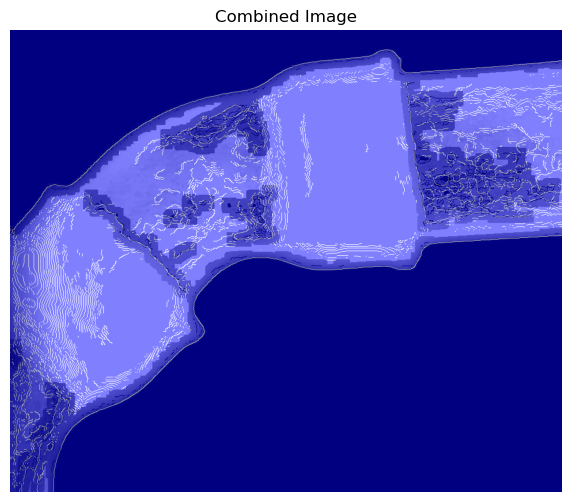

In [91]:
# Check if the image was read successfully
if image is None:
    print("Error: Unable to read the image file.")
else:
    original = image.copy()
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Increase sensitivity of edge detection
    edges = cv2.Canny(blurred, 15, 55)

    # Create a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Dilate the edges to close gaps and get outer edges
    dilated_edges = cv2.dilate(edges, kernel, iterations=5)
    outer_edges = dilated_edges - edges

    # Erode the edges to get inner edges
    eroded_edges = cv2.erode(edges, kernel, iterations=5)
    inner_edges = edges - eroded_edges

    # Find contours of inner and outer edges
    contours_inner, _ = cv2.findContours(inner_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_outer, _ = cv2.findContours(outer_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw inner and outer edges on separate masks
    mask_inner = np.zeros_like(gray)
    mask_outer = np.zeros_like(gray)
    cv2.drawContours(mask_inner, contours_inner, -1, (255), thickness=cv2.FILLED)
    cv2.drawContours(mask_outer, contours_outer, -1, (255), thickness=cv2.FILLED)

    # Invert the masks
    mask_inner_inv = cv2.bitwise_not(mask_inner)
    mask_outer_inv = cv2.bitwise_not(mask_outer)

    # Apply the inverted masks to the original image to get the parts not overlapped by inner or outer edges
    result_image_inner = cv2.bitwise_and(original, original, mask=mask_inner_inv)
    result_image_outer = cv2.bitwise_and(original, original, mask=mask_outer_inv)

    # Combine the images with the original image for highlights
    result_image = cv2.add(result_image_inner, result_image_outer)

    # Apply the first code to generate an image with red edges
    blur = cv2.GaussianBlur(gray, (25, 25), 0, sigmaY=0)
    edges_red = cv2.Canny(blur, 50, 90, apertureSize=5, L2gradient=True)
    edges_red_color = cv2.cvtColor(edges_red, cv2.COLOR_GRAY2BGR)
    edges_red_color[:, :, 0] = 255

    # Combine the original image with the red edges
    combined_image = cv2.addWeighted(result_image, 0.5, edges_red_color, 0.5, 0)

    # Display the combined image
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.title('Combined Image')
    plt.axis('off')
    plt.show()


### Match cracks and non-uniform textures with each other to find the exact points of failure in this pipe. The mentioned factor will have a direct impact on this matter

### Explanation: This code first checks the image and prints an error message if not successful. Then, by applying the necessary filters, it extracts the inner and outer edges from the image. It then removes parts of the image that do not share edges from the original image by creating separate masks for the inner and outer edges. Finally, it combines and displays the image with blue edges.

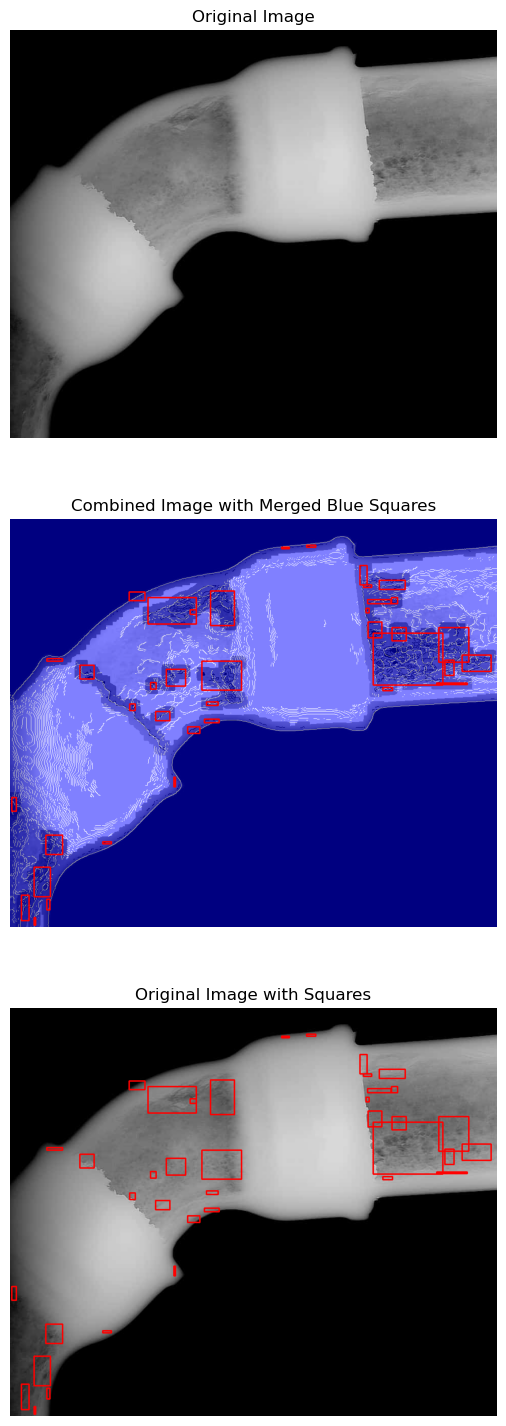

In [93]:
# Assuming 'image' is defined and read successfully

# Check if the image was read successfully
if image is None:
    print("Error: Unable to read the image file.")
else:
    original = image.copy()
    mask = np.zeros(image.shape[:2], dtype=np.uint8) # Create a mask with the same size as the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Increase sensitivity of edge detection
    edges = cv2.Canny(blurred, 15, 55)

    # Create a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Dilate the edges to close gaps and get outer edges
    dilated_edges = cv2.dilate(edges, kernel, iterations=5)
    outer_edges = dilated_edges - edges

    # Erode the edges to get inner edges
    eroded_edges = cv2.erode(edges, kernel, iterations=5)
    inner_edges = edges - eroded_edges

    # Find contours of inner and outer edges
    contours_inner, _ = cv2.findContours(inner_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_outer, _ = cv2.findContours(outer_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw inner and outer edges on separate masks
    mask_inner = np.zeros_like(gray)
    mask_outer = np.zeros_like(gray)
    cv2.drawContours(mask_inner, contours_inner, -1, (255), thickness=cv2.FILLED)
    cv2.drawContours(mask_outer, contours_outer, -1, (255), thickness=cv2.FILLED)

    # Invert the masks
    mask_inner_inv = cv2.bitwise_not(mask_inner)
    mask_outer_inv = cv2.bitwise_not(mask_outer)

    # Apply the inverted masks to the original image to get the parts not overlapped by inner or outer edges
    result_image_inner = cv2.bitwise_and(original, original, mask=mask_inner_inv)
    result_image_outer = cv2.bitwise_and(original, original, mask=mask_outer_inv)

    # Combine the images with the original image for highlights
    result_image = cv2.add(result_image_inner, result_image_outer)

    # Apply the first code to generate an image with red edges
    blur = cv2.GaussianBlur(gray, (25, 25), 0, sigmaY=0)
    edges_red = cv2.Canny(blur, 50, 90, apertureSize=5, L2gradient=True)
    edges_red_color = cv2.cvtColor(edges_red, cv2.COLOR_GRAY2BGR)
    edges_red_color[:, :, 0] = 255  # Set blue channel to maximum intensity

    # Combine the original image with the red edges
    combined_image = cv2.addWeighted(result_image, 0.5, edges_red_color, 0.5, 0)

    # Find the overlapping regions between mask_inner and mask_outer
    overlap = cv2.bitwise_and(mask_inner, mask_outer)

    # Find contours of the overlapping regions
    contours_overlap, _ = cv2.findContours(overlap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Define minimum and maximum size thresholds for filtering squares
    min_square_size = 40
    max_square_size = 800

    # Draw blue squares on the overlapping regions, filtering out squares outside the size range
    rectangles = []
    for contour in contours_overlap:
        x, y, w, h = cv2.boundingRect(contour)
        square_size = w * h
        if min_square_size < square_size < max_square_size:
            rectangles.append((x, y, x + w, y + h))

    # Cluster the rectangles based on spatial proximity
    dbscan = DBSCAN(eps=36, min_samples=1)
    dbscan.fit(rectangles)

    # Merge the rectangles within each cluster
    merged_rectangles = []
    for label in np.unique(dbscan.labels_):
        cluster_indices = np.where(dbscan.labels_ == label)[0]
        cluster_rectangles = [rectangles[i] for i in cluster_indices]
        min_x = min(rect[0] for rect in cluster_rectangles)
        min_y = min(rect[1] for rect in cluster_rectangles)
        max_x = max(rect[2] for rect in cluster_rectangles)
        max_y = max(rect[3] for rect in cluster_rectangles)
        merged_rectangles.append((min_x, min_y, max_x, max_y))

    # Draw merged rectangles on the combined image
    for rect in merged_rectangles:
        x1, y1, x2, y2 = rect
        cv2.rectangle(combined_image, (x1, y1), (x2, y2), (0, 0, 255), thickness=2)

    # Draw rectangles on the original image
    squares_image = original.copy()
    for rect in merged_rectangles:
        x1, y1, x2, y2 = rect
        cv2.rectangle(squares_image, (x1, y1), (x2, y2), (0, 0, 255), thickness=2)

    # Display the original image before applying blue squares
    plt.figure(figsize=(12, 18))

    plt.subplot(3, 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Display the final result with merged blue squares
    plt.subplot(3, 1, 2)
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.title('Combined Image with Merged Blue Squares')
    plt.axis('off')

    # Display the original image with squares
    plt.subplot(3, 1, 3)
    plt.imshow(cv2.cvtColor(squares_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Squares')
    plt.axis('off')

    plt.show()


### Draw red squares to show the exact initial points or very sensitive initial areas where the potential risk of rod failure can start and spread from these areas.

### Explanation: This code first checks the image and prints an error message if not successful. Then it extracts the inner and outer edges from the image and creates a separate mask for each. It then removes parts of the image that do not share any inner or outer edges. After that, it adds blue edges to the original image and creates red rectangles on the overlapping areas between the inner and outer masks. Finally, it displays the final images.

# WELD ANALYSES

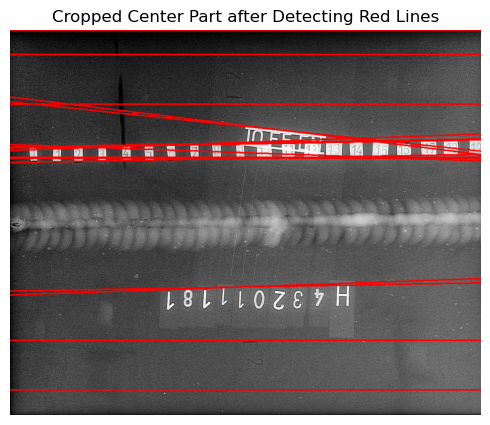

In [363]:
# Read the image
image_path = "project_pics/weld.JPG"
image = cv2.imread(image_path)

# Define the region of interest (ROI) excluding areas containing numbers
roi = np.ones_like(image[:, :, 0], dtype=np.uint8) * 255
roi[50:150, :] = 0  # Exclude the top 50-150 rows (numbers)
roi[-150:-50, :] = 0  # Exclude the bottom 50-150 rows (numbers)
roi[:, :100] = 0  # Exclude the left 100 columns (numbers)
roi[:, -100:] = 0  # Exclude the right 100 columns (numbers)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to segment the image and filter out regions containing numbers
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

# Apply the ROI mask
thresh = cv2.bitwise_and(thresh, thresh, mask=roi)

# Perform Canny edge detection
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)

# Perform Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 105)

# Determine the bounding box around detected lines
min_x, max_x = np.inf, -np.inf
for rho, theta in lines[:, 0]:
    if np.abs(theta - np.pi/2) < np.pi/4:  # Only consider lines in the x-direction
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        min_x = min(min_x, x1, x2)
        max_x = max(max_x, x1, x2)

# Crop the image to keep only the center part
cropped_image = image[:, int(min_x):int(max_x)]

# Display the result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Center Part after Detecting Red Lines')
plt.axis('off')
plt.show()


### Explanation: This code first reads the image from the specified path and removes the area that contains numbers from the image. Then it converts the image into gray levels and reduces the noise by applying a Gaussian filter. After that, it detects the edges of the image using the Canny method. Then, using the Hough Line Transform method, it detects the red lines in the image and cuts a range around them to preserve the central part of the image. Finally, the image is cropped to the required size and displayed.

### This section is not implemented to show the red lines on the whole image, and this operation is done in the next cell

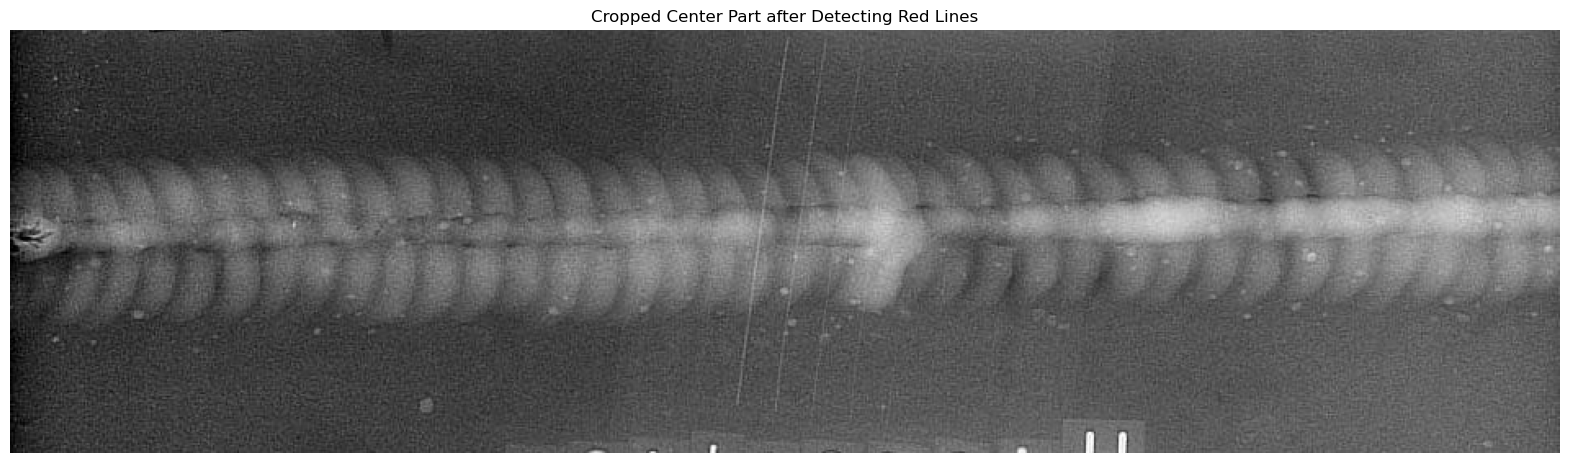

In [364]:
# Define the region of interest (ROI) excluding areas containing numbers
roi = np.ones_like(image[:, :, 0], dtype=np.uint8) * 255
roi[50:150, :] = 0  # Exclude the top 50-150 rows (numbers)
roi[-150:-50, :] = 0  # Exclude the bottom 50-150 rows (numbers)
roi[:, :100] = 0  # Exclude the left 100 columns (numbers)
roi[:, -100:] = 0  # Exclude the right 100 columns (numbers)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to segment the image and filter out regions containing numbers
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

# Apply the ROI mask
thresh = cv2.bitwise_and(thresh, thresh, mask=roi)

# Perform Canny edge detection
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)

# Perform Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 105)

# Find the center y-coordinate of the image
center_y = image.shape[0] // 2

# Find the closest red lines above and below the center
upper_line_y = -1
lower_line_y = image.shape[0] + 1
if lines is not None:
    for rho, theta in lines[:, 0]:
        if np.abs(theta - np.pi/2) < np.pi/4:  # Only consider lines in the x-direction
            a = np.cos(theta)
            b = np.sin(theta)
            y0 = b * rho
            if y0 < center_y and y0 > upper_line_y:
                upper_line_y = y0
            elif y0 > center_y and y0 < lower_line_y:
                lower_line_y = y0

# Crop the image based on the closest red lines
cropped_image = image[int(upper_line_y):int(lower_line_y), :]

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Center Part after Detecting Red Lines')
plt.axis('off')
plt.show()


### Explanation: In this code, it first reads the image from the specified path and removes the area that contains numbers from the image. Then it converts the image into gray levels and reduces the noise by applying a Gaussian filter. Then, using the Canny method, it detects the edges of the image. Then, using the Hough Line Transform method, it detects the red lines in the image and finds the highest and lowest red lines and cuts the image based on them. Finally, the image is cropped to the required size and displayed.

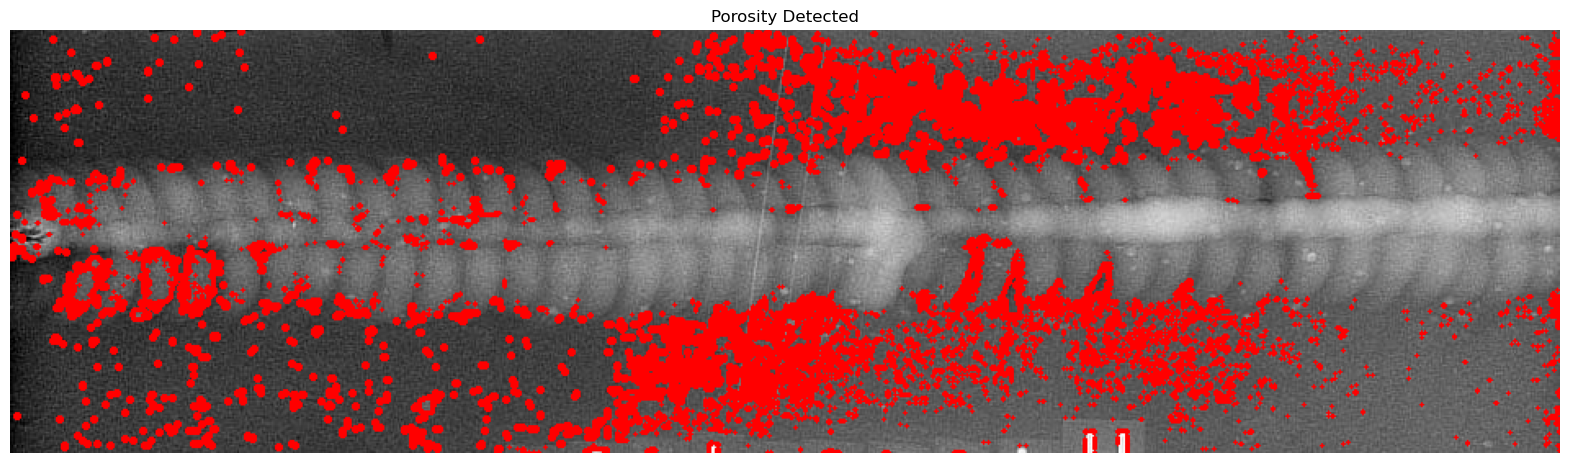

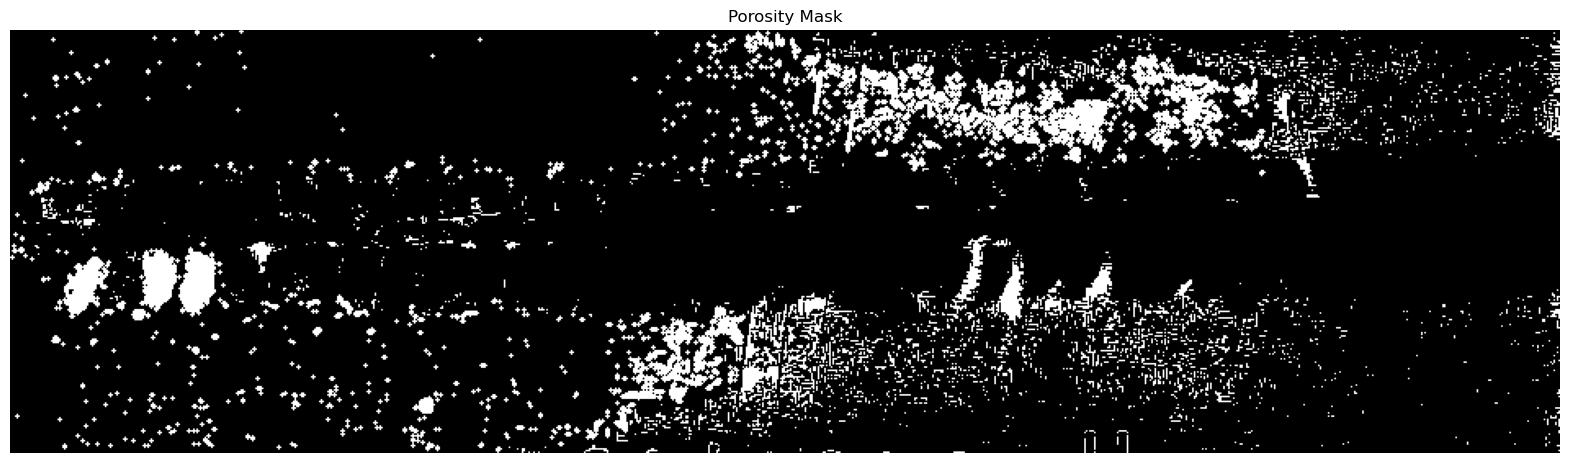

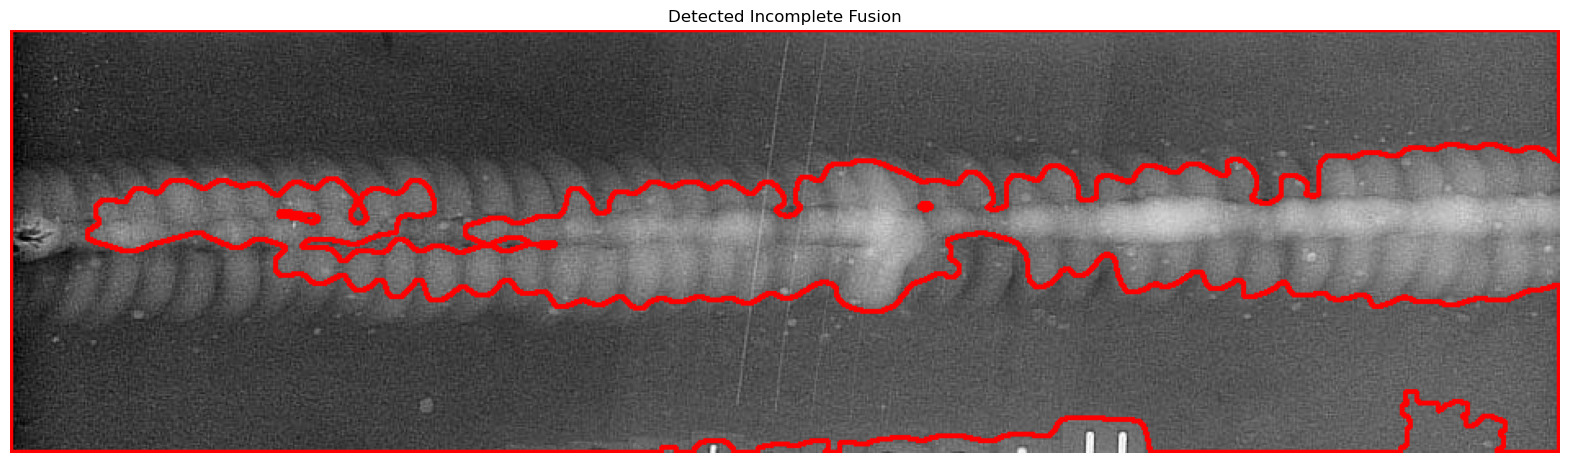

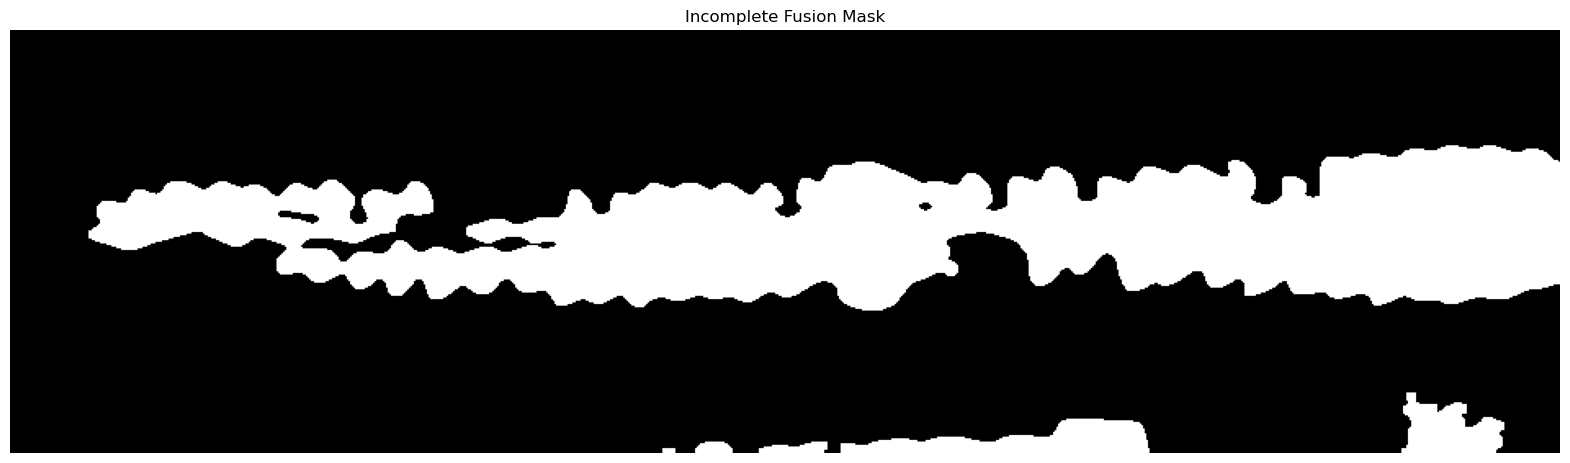

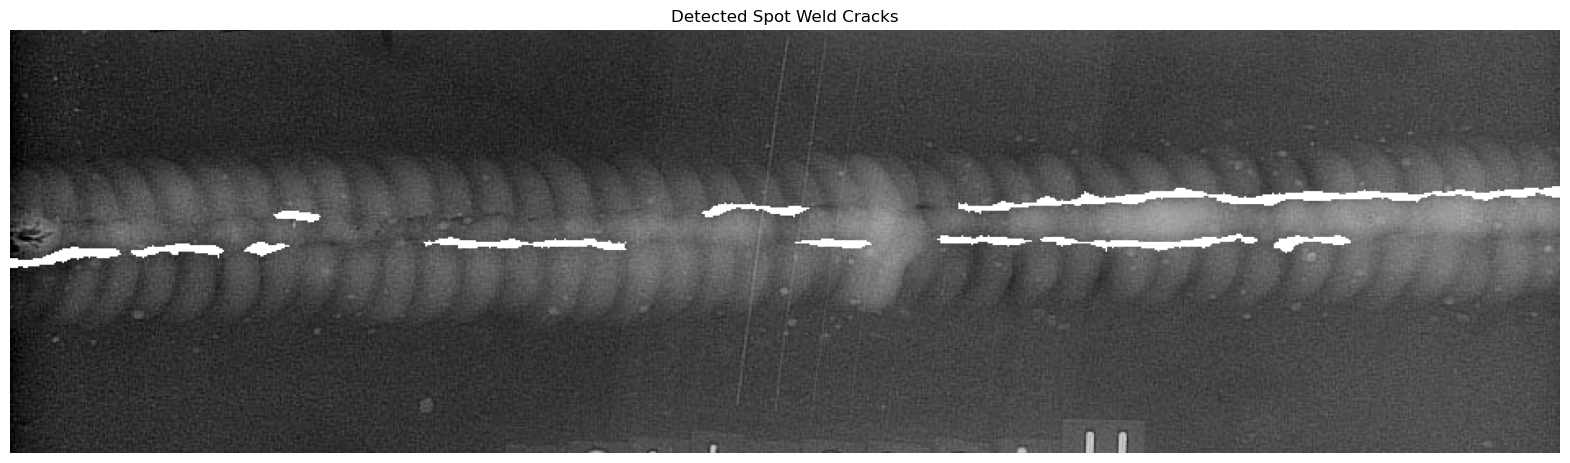

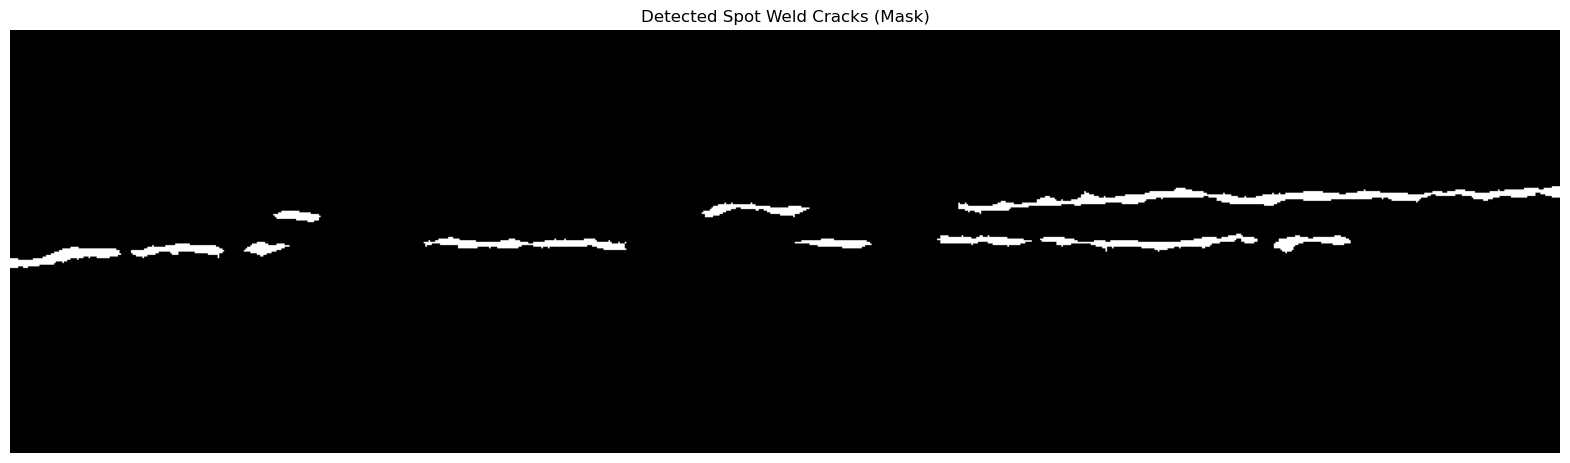

In [365]:
# Convert the image to grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.fastNlMeansDenoising(gray, None, 5, 2, 9)

# Thresholding to segment the image
_, thresh = cv2.threshold(blurred, 80, 225, cv2.THRESH_TOZERO_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw contours
contour_image = cropped_image.copy()

# Iterate through contours to detect porosity
porosity_detected = False
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 3000:  # Adjust threshold as needed
        porosity_detected = True
        # Draw contour on the contour image
        cv2.drawContours(contour_image, [contour], -1, (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
if porosity_detected:
    plt.title('Porosity Detected')
else:
    plt.title('No Porosity Detected')
plt.axis('off')
plt.show()

# Create a blank mask
Porosity_mask = np.zeros_like(gray)

# Iterate through contours to detect porosity and draw filled contours on the mask
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 3000:  # Adjust threshold as needed
        cv2.drawContours(Porosity_mask, [contour], -1, 255, -1)  # Fill contour with white color (255)

# Display the mask
plt.figure(figsize=(20, 10))
plt.imshow(Porosity_mask, cmap='gray')
plt.title('Porosity Mask')
plt.axis('off')
plt.show()

# Assuming 'cropped_image' is your original image

# Make a copy of the cropped image
cropped_image_copy = cropped_image.copy()

# Convert the copied image to grayscale
gray = cv2.cvtColor(cropped_image_copy, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (29, 13), 0)

# Thresholding to segment the image
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations to fill small gaps and smooth the image
kernel = np.ones((5, 5), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image (for visualization)
result_image = cropped_image.copy()
cv2.drawContours(result_image, contours, -1, (0, 0, 255), 2)

# Calculate the area of each contour and filter out small contours
min_area = 100  # Adjust this threshold as needed
incomplete_fusion_contours = [cnt for cnt in contours if cv2.contourArea(cnt) < min_area]

# Draw contours of incomplete fusion on the result image
cv2.drawContours(result_image, incomplete_fusion_contours, -1, (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Incomplete Fusion')
plt.axis('off')
plt.show()

# Create a blank mask image
fusion_mask = np.zeros_like(gray)

# Draw contours of incomplete fusion on the mask (highlighted in white)
cv2.drawContours(fusion_mask, contours, -1, 255, thickness=cv2.FILLED)

# Invert the mask so that incomplete fusion areas are white
fusion_mask = cv2.bitwise_not(fusion_mask)

# Display the mask
plt.figure(figsize=(20, 10))
plt.imshow(fusion_mask, cmap='gray')
plt.title('Incomplete Fusion Mask')
plt.axis('off')
plt.show()

# Detected Spot Weld Cracks
# Convert the grayscale image to binary using adaptive thresholding
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to fill small gaps and smooth the image
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary image
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to draw the detected contours
cracks_mask = np.zeros_like(gray)

# Iterate through contours and filter out small ones
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Adjust the threshold as needed
        cv2.drawContours(cracks_mask, [contour], -1, (255, 255, 255), -1)  # Fill contour with white color

# Merge the detected contours with the original image
cracks_image = cv2.addWeighted(cropped_image, 0.8, cv2.cvtColor(cracks_mask, cv2.COLOR_GRAY2BGR), 1, 0)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(cracks_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Spot Weld Cracks')
plt.axis('off')
plt.show()

# Display the detected contours
plt.figure(figsize=(20, 10))
plt.imshow(cracks_mask, cmap='gray')
plt.title('Detected Spot Weld Cracks (Mask)')
plt.axis('off')
plt.show()



### This code performs a series of image processing on welding images. First, it converts the image to gray levels and then reduces the noise by applying a Gaussian filter. Then, using the Adaptive Thresholding method, it converts the image into binary and by applying morphological operations, it fills the smallest points and enhances the image. After that, using Hough Line Transform and Contour Detection methods, red lines and inhomogeneous areas and welding points are seen. These operations are applied using different masks that help to identify and characterize different areas. Finally, incomplete welding areas, broken welding spots and exclusive welding spots are displayed with different colors on the image.

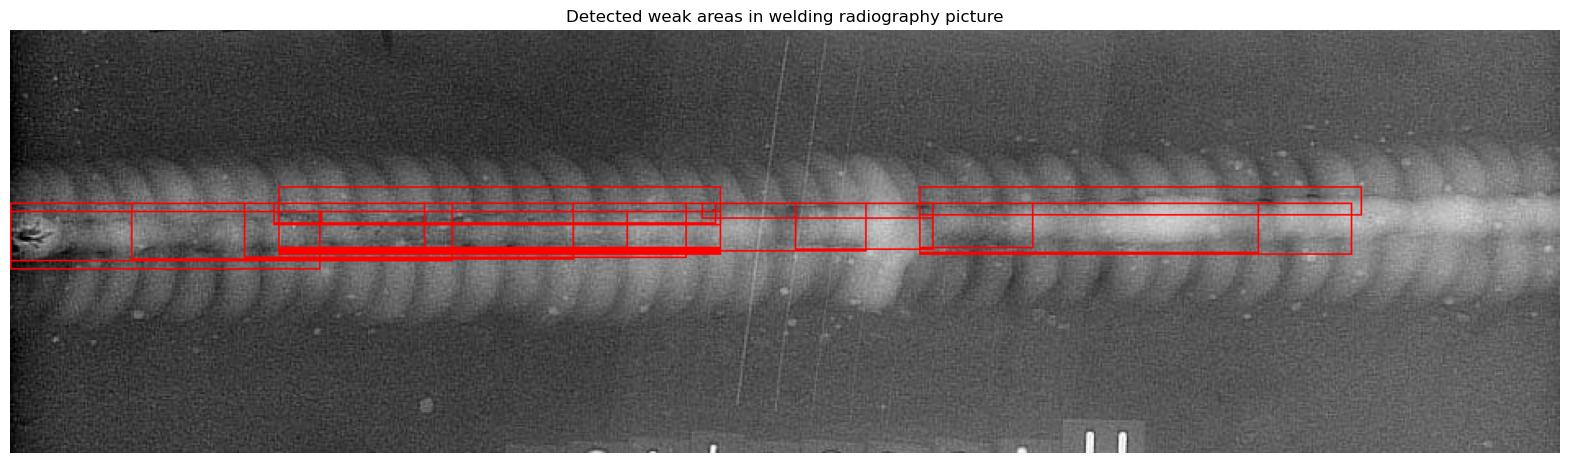

In [367]:
final_image = cropped_image.copy()
max_width = 270  # Maximum width of the square
max_height = 35  # Maximum height of the square

# Iterate through spot weld cracks contours
for crack_contour in contours:
    crack_area = cv2.contourArea(crack_contour)
    if crack_area > 100:  # Adjust the threshold as needed

        # Iterate through incomplete fusion contours
        for fusion_contour in incomplete_fusion_contours:
            fusion_area = cv2.contourArea(fusion_contour)

            # Create binary masks for crack and fusion contours
            crack_mask = np.zeros_like(cracks_mask)
            cv2.drawContours(crack_mask, [crack_contour], -1, 255, -1)
            fusion_mask = np.zeros_like(fusion_mask)
            cv2.drawContours(fusion_mask, [fusion_contour], -1, 255, -1)

            # Calculate the intersection of crack and fusion contours
            intersection = cv2.bitwise_or(crack_mask, fusion_mask, Porosity_mask)

            # If the intersection is not empty, it means there's an overlap
            if cv2.countNonZero(intersection) > 0:

                # Get the bounding rectangle for the combined area
                x, y, w, h = cv2.boundingRect(cv2.bitwise_or(crack_mask, fusion_mask, Porosity_mask))

                # Limit the size of the bounding rectangle
                w = min(w, max_width)
                h = min(h, max_height)

                # Draw a rectangle around the combined area on the original image
                cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Detected weak areas in welding radiography picture')
plt.axis('off')
plt.show()


### This part of the code detects weak areas and weld spots in the welding image. First, a final image is created to display the initial images. Then, through the nested loops, it detects smaller areas of the weld, known as broken weld spots. Then, for each welding point, different functions check whether it is located at the intersection of weak areas and welding points. If there is a junction, a rectangle with the specified dimensions is drawn around that junction and finally shows the identified weak spots on the final image.